# Compute xG

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from mplsoccer import Pitch, VerticalPitch 

# Read Data

In [3]:
df_shots= pd.read_parquet("./data/data-epl-shots.parquet")

In [4]:
df_shots

,ball_receipt_outcome,ball_recovery_recovery_failure,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_nutmeg,...,block_save_block,shot_deflected,player_off_permanent,goalkeeper_success_in_play,shot_follows_dribble,goalkeeper_lost_out,half_start_late_video_start,goalkeeper_lost_in_play,goalkeeper_penalty_saved_to_post,goalkeeper_saved_to_post
3149,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3150,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3151,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3152,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3153,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443018,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1443019,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1443020,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1443021,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


# Expand Coordinates 

In [5]:
df_shots.location

3149       [107.1, 26.6]
3150       [113.7, 54.0]
3151       [115.7, 50.5]
3152       [113.9, 38.6]
3153        [96.7, 47.2]
               ...      
1443018     [78.2, 38.9]
1443019    [113.8, 33.3]
1443020     [96.6, 24.7]
1443021    [109.7, 25.1]
1443022    [111.5, 43.0]
Name: location, Length: 10837, dtype: object

In [6]:
# from [x, y] to two columns, 'shot_x' and 'shot_y'
df_shots[ ["shot_x", "shot_y"] ] = df_shots.location.to_list()

In [7]:
# drop the old one 
df_shots.drop(columns=["location"], inplace=True)

In [8]:
df_shots

,ball_receipt_outcome,ball_recovery_recovery_failure,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_nutmeg,...,player_off_permanent,goalkeeper_success_in_play,shot_follows_dribble,goalkeeper_lost_out,half_start_late_video_start,goalkeeper_lost_in_play,goalkeeper_penalty_saved_to_post,goalkeeper_saved_to_post,shot_x,shot_y
3149,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,107.1,26.6
3150,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,113.7,54.0
3151,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,115.7,50.5
3152,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,113.9,38.6
3153,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,96.7,47.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443018,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,78.2,38.9
1443019,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,113.8,33.3
1443020,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,96.6,24.7
1443021,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,109.7,25.1


# Pitch Coordinates

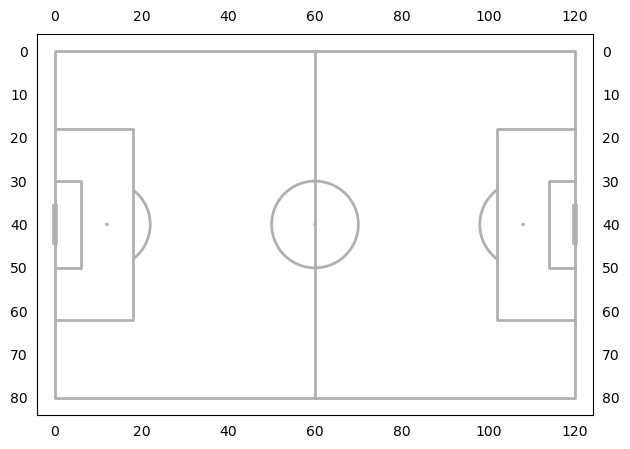

In [9]:
pitch= Pitch(
    pitch_type="statsbomb", 
    axis= True, label= True
)

fig, ax= pitch.draw()

plt.show()

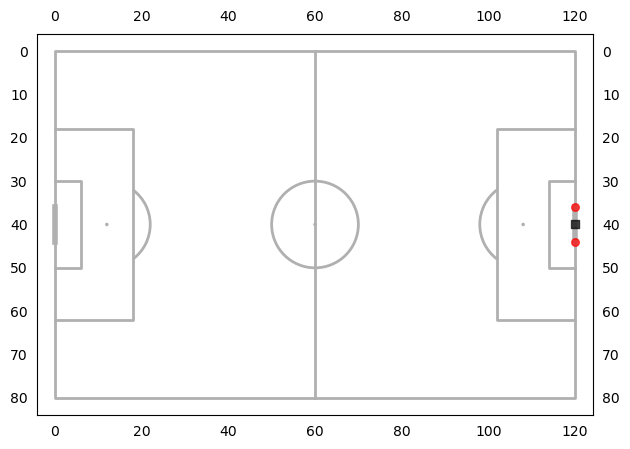

In [10]:
pitch= Pitch(
    pitch_type="statsbomb", 
    axis=True, label=True
)

fig, ax=pitch.draw()

gx= 120 
gy1= 36 
gy2= 44 
gy= gy1 + (gy2-gy1) / 2

pitch.scatter(
    gx, gy1, 
    c="red", s=30, alpha=0.7, 
    ax=ax
)

pitch.scatter(
    gx, gy2, 
    c="red", s=30, alpha=0.7, 
    ax=ax
)

pitch.scatter(
    gx, gy, 
    c="black", s=30, alpha=0.7, 
    marker="s", 
    ax=ax
)

plt.show()

# Shot Distance

## Visualization

In [11]:
# example with the 23rd shots
shot= df_shots.iloc[23]

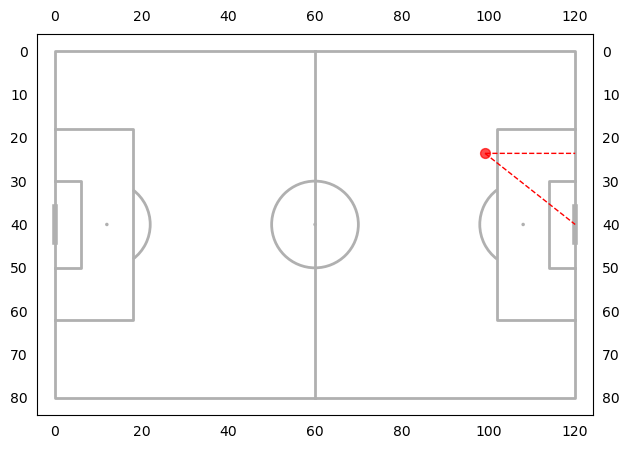

In [12]:
pitch= Pitch(
    pitch_type="statsbomb",
    axis=True, label=True
)

fig, ax= pitch.draw()

pitch.scatter(
    shot.shot_x, shot.shot_y, 
    c="red", s=50, alpha=0.7, 
    ax=ax
)

pitch.lines(
    shot.shot_x, shot.shot_y, gx, gy, 
    color="red", linewidth=1, linestyle= "--",
    ax=ax
)

pitch.lines(
    shot.shot_x, shot.shot_y, 120, shot.shot_y, 
    color="red", linewidth=1, linestyle= "--",
    ax=ax
)

plt.show()
    

# Compute Distance

In [13]:
data= pd.DataFrame(index=df_shots.index)

In [14]:
data

""
3149
3150
3151
3152
3153
...
1443018
1443019
1443020
1443021


In [15]:
data["x"] = gx-df_shots.shot_x

In [16]:
data["y"]= np.abs(gy-df_shots.shot_y)

In [17]:
data["distance"]= np.sqrt(data.x**2+data.y**2)

In [18]:
data

,x,y,distance
3149,12.9,13.4,18.600269
3150,6.3,14.0,15.352199
3151,4.3,10.5,11.346365
3152,6.1,1.4,6.258594
3153,23.3,7.2,24.387087
...,...,...,...
1443018,41.8,1.1,41.814471
1443019,6.2,6.7,9.128527
1443020,23.4,15.3,27.958004
1443021,10.3,14.9,18.113531


# Shot Angle

## Compute Angle

In [19]:
goal_width=gy2-gy1
goal_width

8

In [20]:
np.arctan((data.x*goal_width)/(data.x**2+data.y**2-(goal_width/2)**2))

3149       0.303118
3150       0.225512
3151       0.296154
3152       1.127515
3153       0.311593
             ...   
1443018    0.190676
1443019    0.634915
1443020    0.239794
1443021    0.258128
1443022    0.806033
Length: 10837, dtype: float64

In [21]:
data["angle"]= np.arctan((data.x*goal_width)/(data.x**2+data.y**2-(goal_width/2)**2))

In [22]:
# convert to degree
data["angle"]=data["angle"]*180/np.pi

In [23]:
# handle negative degrees
data.angle= data.angle.apply(lambda angle: angle if angle >=0 else angle+180)

In [24]:
data

,x,y,distance,angle
3149,12.9,13.4,18.600269,17.367371
3150,6.3,14.0,15.352199,12.920882
3151,4.3,10.5,11.346365,16.968355
3152,6.1,1.4,6.258594,64.601862
3153,23.3,7.2,24.387087,17.852948
...,...,...,...,...
1443018,41.8,1.1,41.814471,10.924958
1443019,6.2,6.7,9.128527,36.377965
1443020,23.4,15.3,27.958004,13.739171
1443021,10.3,14.9,18.113531,14.789639


# Goal

In [25]:
df_shots.shot_outcome

3149       Blocked
3150       Blocked
3151         Off T
3152         Off T
3153       Wayward
            ...   
1443018    Blocked
1443019      Saved
1443020      Off T
1443021      Off T
1443022      Off T
Name: shot_outcome, Length: 10837, dtype: object

In [26]:
# boolean
df_shots.shot_outcome=="Goal"

3149       False
3150       False
3151       False
3152       False
3153       False
           ...  
1443018    False
1443019    False
1443020    False
1443021    False
1443022    False
Name: shot_outcome, Length: 10837, dtype: bool

In [27]:
# False=0, True=1
(df_shots.shot_outcome == "Goal").astype(int)

3149       0
3150       0
3151       0
3152       0
3153       0
          ..
1443018    0
1443019    0
1443020    0
1443021    0
1443022    0
Name: shot_outcome, Length: 10837, dtype: int32

In [28]:
data["goal"] = (df_shots.shot_outcome == "Goal").astype(int)

In [29]:
data

,x,y,distance,angle,goal
3149,12.9,13.4,18.600269,17.367371,0
3150,6.3,14.0,15.352199,12.920882,0
3151,4.3,10.5,11.346365,16.968355,0
3152,6.1,1.4,6.258594,64.601862,0
3153,23.3,7.2,24.387087,17.852948,0
...,...,...,...,...,...
1443018,41.8,1.1,41.814471,10.924958,0
1443019,6.2,6.7,9.128527,36.377965,0
1443020,23.4,15.3,27.958004,13.739171,0
1443021,10.3,14.9,18.113531,14.789639,0


In [30]:
data [ data.goal == 1]

,x,y,distance,angle,goal
6612,1.3,2.5,2.817801,127.775684,1
9904,10.4,7.1,12.592458,30.266681,1
9912,17.9,15.1,23.418369,15.054054,1
13752,17.5,9.1,19.724604,20.569845,1
13753,7.5,4.1,8.547514,46.438700,1
...,...,...,...,...,...
1436431,21.0,10.0,23.259407,17.744672,1
1436434,7.2,3.8,8.141253,48.881750,1
1436438,2.2,5.1,5.554278,49.844000,1
1439877,12.1,0.1,12.100413,36.583449,1


# Distance and Goal

## Visualization

In [31]:
data.loc[:, ["distance", "goal"]]

,distance,goal
3149,18.600269,0
3150,15.352199,0
3151,11.346365,0
3152,6.258594,0
3153,24.387087,0
...,...,...
1443018,41.814471,0
1443019,9.128527,0
1443020,27.958004,0
1443021,18.113531,0


In [32]:
# sort by distance 
data.loc[:, ["distance", "goal"]].sort_values(by="distance")

,distance,goal
487938,0.921954,1
347577,1.140175,1
1230258,1.529706,0
246250,1.769181,1
691843,1.843909,1
...,...,...
1412896,72.562318,0
432955,72.568106,0
508510,72.800275,0
256414,78.487260,0


In [33]:
colors =  {0: "silver", 1: "yellow"}

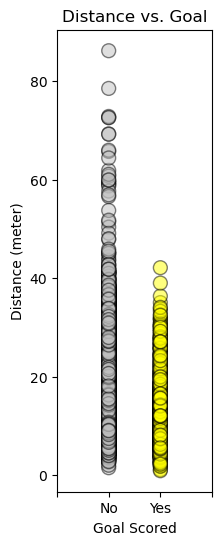

In [34]:
fig, ax = plt.subplots(figsize=(2, 6))

ax.scatter(
    data.goal, data.distance, 
    marker="o", color=data.goal.apply(lambda x:colors[x]), edgecolor="black", alpha=0.5, 
    s= 100
)

ax.set_xlabel("Goal Scored")
ax.set_ylabel("Distance (meter)")

ax.set_xticks([-1, 0, 1, 2], labels=["", "No", "Yes", ""])
ax.set_title("Distance vs. Goal")

plt.show()

# Compute xG

In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

In [36]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [37]:
model_distance= smf.glm(formula='goal ~ distance', data=data, family=sm.families.Binomial())
model_distance= model_distance.fit()

In [38]:
model_distance.params

Intercept   -0.228784
distance    -0.121076
dtype: float64

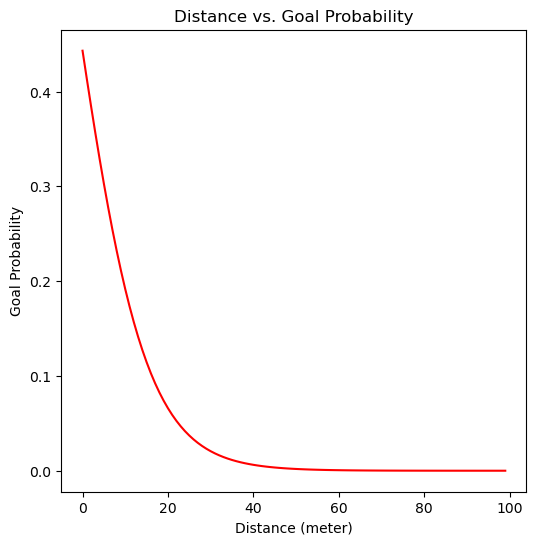

In [39]:
fig, ax= plt.subplots(figsize= (6,6))

distance=np.arange(0, 100, 1)
y= sigmoid(model_distance.params.Intercept + model_distance.params.distance * distance)
ax.plot(distance, y, c='red')

ax.set_xlabel("Distance (meter)")
ax.set_ylabel("Goal Probability")
ax.set_title("Distance vs. Goal Probability")

plt.show()

# Angle and Goal 

## Visualization

In [40]:
data.loc[:, ["angle", "goal"]]

,angle,goal
3149,17.367371,0
3150,12.920882,0
3151,16.968355,0
3152,64.601862,0
3153,17.852948,0
...,...,...
1443018,10.924958,0
1443019,36.377965,0
1443020,13.739171,0
1443021,14.789639,0


In [41]:
# sort by angle 
data.loc[:, ["angle", "goal"]].sort_values(by="angle")

,angle,goal
1313707,1.044736,0
283643,1.513607,0
396738,2.608906,0
980688,2.951538,0
957848,2.954930,0
...,...,...
413850,148.836481,1
347577,149.093597,1
314256,151.423716,1
487938,159.713824,1


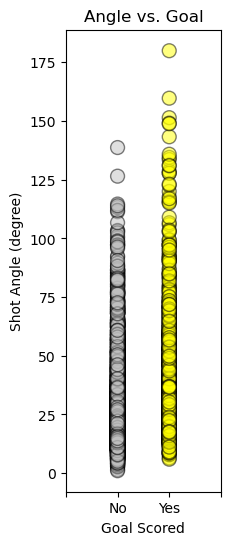

In [43]:
fig, ax= plt.subplots(figsize=(2,6))

ax.scatter(
    data.goal, data.angle, 
    marker="o", color=data.goal.apply(lambda x: colors[x]), edgecolor="black", alpha=0.5,
    s=100
)

ax.set_xlabel("Goal Scored")
ax.set_ylabel("Shot Angle (degree)")

ax.set_xticks([-1, 0, 1, 2], labels=["", "No", "Yes", ""])
ax.set_title("Angle vs. Goal")

plt.show()

# Compute xG

In [44]:
model_angle= smf.glm(
    formula="goal ~ angle", 
    data=data, 
    family=sm.families.Binomial()
)

model_angle=model_angle.fit()

In [45]:
model_angle.params

Intercept   -3.416192
angle        0.041305
dtype: float64

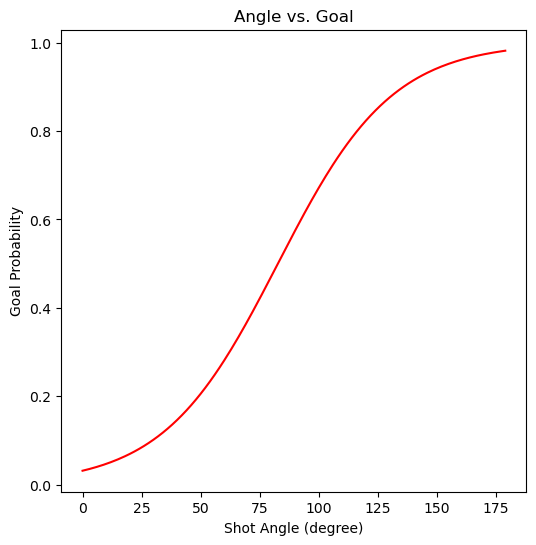

In [47]:
fig, ax= plt.subplots(figsize=(6,6))

angle= np.arange(0, 180)
y= sigmoid(model_angle.params.Intercept + model_angle.params.angle * angle)
ax.plot(angle, y, c="red")

ax.set_xlabel("Shot Angle (degree)")
ax.set_ylabel("Goal Probability")
ax.set_title("Angle vs. Goal")

plt.show()

# X, Y, Distance, Angle, and Goal 

In [49]:
formula= "goal ~ x + y + distance + angle"

model= smf.glm(
    formula= formula,
    data= data, 
    family= sm.families.Binomial()
)

model = model.fit()

In [50]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   goal   No. Observations:                10837
Model:                            GLM   Df Residuals:                    10832
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3129.1
Date:                Thu, 05 Sep 2024   Deviance:                       6258.2
Time:                        14:40:33   Pearson chi2:                 1.09e+04
No. Iterations:                     6   Pseudo R-squ. (CS):            0.06946
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0331      0.217     -4.766      0.000      -1.458      -0.608
x             -0.0639      0.035     -1.839      0.066      -0.132       0.004
y             -0.0702      0.020     -3.445      0.001      -0.110      -0.030
distance      -0.0105      0.040     -0.261      0.794      -0.089       0.068
angle          0.0125      0.003      4.224      0.000       0.007       0.018
==============================================================================
"""

In [51]:
model.params

Intercept   -1.033070
x           -0.063889
y           -0.070248
distance    -0.010458
angle        0.012461
dtype: float64

In [52]:
data["xg"]= data.apply(
    lambda row: sigmoid(model.params.Intercept + model.params.x *row.x + model.params.y * row.y +model.params.distance*row.distance+ model.params.angle*row.angle),
    axis=1
)